# Linear Regression Practice

In this notebook we'll practice linear regresssions on a new data set of real estate transactions from Sacramento.

Start by [downloading](https://trello-attachments.s3.amazonaws.com/5679b2e91535c674fadb2efe/56b39dbfc8bbe91b11d49e9f/bb26a8e51e1bb392f94c7d7f045b875c/Sacramentorealestatetransactions.csv) the data.

In the next cell load the data using pandas. Once you have a data frame, use `data.head()` to look at the first few rows.

In [76]:
%matplotlib inline
import pandas as pd

filename = "Sacramentorealestatetransactions.csv"

data = pd.read_csv(filename)

data.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [77]:
data['street'] = pd.Series(['-'.join(str(x).split(" ")[1:-1]) for x in data['street']])
data.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,HIGH,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,OMAHA,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,BRANCH,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,JANETTE,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,MCMAHON,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


## Exploratory Analysis

Use pandas to look through the data. Plot the variables as histograms or pairs in scatter plots as needed with matplotlib, pandas, or seaborn until you understand each one.

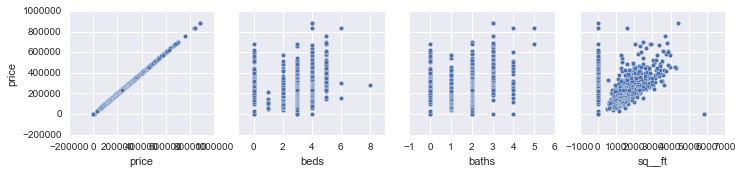

In [66]:
import seaborn as sns
sns.pairplot(data=data, x_vars=['price', 'beds', 'baths', 'sq__ft'], y_vars=['price'])

## Visualize the Data
The data set contains a number of variables that may be correlated with the price of the properties. Make plots of the relevant variables versus the column "price". You can use pandas, matplotlib, or seaborn.

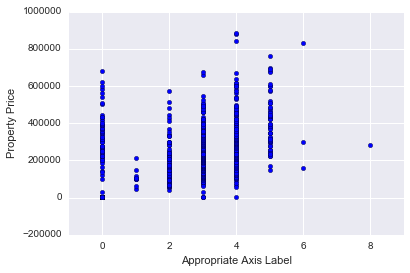

In [78]:
import seaborn as sns
from matplotlib import pyplot as plt

x = data['beds'] # , 'baths', 'sq__ft'
y = data['price']

plt.scatter(x, y)
plt.xlabel("Appropriate Axis Label")
plt.ylabel("Property Price")
plt.show()

## Regressions

* Perform a series of regressions on various combinations of the independent variables.
* Plot the predicted values versus the true values
* Which combinations gives the best fit?

You can use either scikit-learn or statsmodels

In [79]:
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [88]:
import numpy as np
import pandas as pd
targets = data['price']
y = data['price']
df = pd.DataFrame(data, columns=data.drop('price', axis=1).columns)
df2 = pd.concat([df, targets], axis = 1)
df2.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,latitude,longitude,price
0,HIGH,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,38.631913,-121.434879,59222
1,OMAHA,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,38.478902,-121.431028,68212
2,BRANCH,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,38.618305,-121.443839,68880
3,JANETTE,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,38.616835,-121.439146,69307
4,MCMAHON,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,38.519470,-121.435768,81900


## Bonus Exercises

* Find the best model you can with the three variables
* Are longitude and latitude useful separately? Try adding each and both to another model and look for mean_squared_error improvement
* Can you find any significant correlations between the non-price variables? Which ones?

In [99]:
df2.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
latitude     float64
longitude    float64
price          int64
dtype: object

In [92]:
lowest_mse = 100000
lowest_mse_name = "it is"

for column in df.columns:
    model = smf.ols(formula = 'price ~ ' + str(column), data = df2).fit() # This formula style automatically adds an intercept
    predictions = model.predict()
    print str(column), mean_squared_error(y, predictions)
    if mean_squared_error(y, predictions) < lowest_mse:
        lowest_mse = mean_squared_error(y, predictions)
        lowest_mse_name = "MSE for 'price ~ " + str(column) + "':", mean_squared_error(y, predictions)

print lowest_mse_name

street 781227641.101
city 11315780182.3
zip 18958993656.4
state 19125668770.4
beds 16888339262.8
baths 15812545335.3
sq__ft 16993401954.2
type 18711691240.0
sale_date 17938398534.7
latitude 19095717147.9
longitude 17577797967.2
it is


In [83]:
df2.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,latitude,longitude,price
0,HIGH,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,38.631913,-121.434879,59222
1,OMAHA,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,38.478902,-121.431028,68212
2,BRANCH,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,38.618305,-121.443839,68880
3,JANETTE,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,38.616835,-121.439146,69307
4,MCMAHON,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,38.519470,-121.435768,81900


In [97]:
model = smf.ols(formula = 'price ~ latitude + longitude', data = df2).fit() # This formula style automatically adds an intercept
predictions = model.predict()
print "MSE for 'price ~ latitude + longitude':", mean_squared_error(y, predictions)

MSE for 'price ~ latitude + longitude': 17071699962.5
